In [ ]:
#!git clone https://github.com/atikul-islam-sajib/TreeBasedModel.git

In [3]:
#%cd TreeBasedModel

/home/markusloecher/research/Atikul/TreeBasedModel


In [4]:
#!pip install --upgrade pip

  Using cached pip-24.0-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 23.0.1
    Uninstalling pip-23.0.1:
      Successfully uninstalled pip-23.0.1


In [ ]:
#!pip install -e .

In [ ]:
from TreeModelsFromScratch.RandomForest import RandomForest
from TreeModelsFromScratch.datasets import DATASETS_CLASSIFICATION, DATASET_PATH

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from imodels import get_clean_dataset

In [ ]:
from sklearn.ensemble import RandomForestClassifier

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [ ]:
import warnings
import logging


warnings.filterwarnings("ignore", message="should_run_async will not call transform_cell automatically in the future")
logging.getLogger().setLevel(logging.WARNING)



import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from imodels import get_clean_dataset  # Assuming this function can also provide regression datasets

def perform_regression(dataset_name, n_trees=25, k=None, max_features=None):
    # Fetch the dataset
    X, y, feature_names = get_clean_dataset(dataset_name)  # Ensure this function can provide regression datasets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and fit your custom RandomForest for regression
    custom_rf = RandomForest(n_trees=n_trees, treetype='regression', k=k, n_feature=max_features)
    custom_rf.fit(X_train, y_train)

    # Calculate MSE for custom predictions
    custom_mse = mean_squared_error(y_test, custom_rf.predict(X_test))

    # Creating a DataFrame for the result
    result_df = pd.DataFrame({
        'Dataset': [dataset_name],
        'K': [k],
        'Max Features': [max_features],
        'Custom MSE': [custom_mse]
    })

    return result_df

def perform_sklearn_regression(dataset_name, n_estimators=25, max_features=None):
    X, y, _ = get_clean_dataset(dataset_name)  # Ensure this function can provide regression datasets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestRegressor(n_estimators=n_estimators, max_features=max_features, random_state=42)
    model.fit(X_train, y_train)
    mse = mean_squared_error(y_test, model.predict(X_test))

    # Creating a DataFrame for the result
    result_df = pd.DataFrame({
        'Dataset': [dataset_name],
        'Max Features': [max_features],
        'Sklearn MSE': [mse]
    })

    return result_df

# Initialization of DataFrames
regression_results = pd.DataFrame()
sklearn_regression_results = pd.DataFrame()

# Example usage with different datasets and parameter values for demonstration
regression_datasets = ["fico", "enhancer", "credit_g", "juvenile_clean"] # Example regression datasets
k_values = [1,2,4,6,8,10,15]  # K parameter is not typically used in sklearn's RandomForestRegressor, adjust if your custom implementation does
max_features_values = [0.2, 0.4, 0.6, 0.8]  # Example max_features settings

# Main loop for regression tasks
for dataset_name in regression_datasets:
    for k in k_values:  # Loop over k_values if your custom implementation uses it
        for max_features in max_features_values:
            custom_result = perform_regression(dataset_name, n_trees=25, k=k, max_features=max_features)
            regression_results = pd.concat([regression_results, custom_result], ignore_index=True)

            sklearn_result = perform_sklearn_regression(dataset_name, n_estimators=25, max_features=max_features)
            sklearn_regression_results = pd.concat([sklearn_regression_results, sklearn_result], ignore_index=True)

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


fetching fico from imodels
fetching fico from imodels
fetching fico from imodels
fetching fico from imodels
fetching fico from imodels
fetching fico from imodels
fetching fico from imodels
fetching fico from imodels
fetching fico from imodels
fetching fico from imodels
fetching fico from imodels
fetching fico from imodels
fetching fico from imodels
fetching fico from imodels
fetching fico from imodels
fetching fico from imodels
fetching fico from imodels
fetching fico from imodels
fetching fico from imodels
fetching fico from imodels
fetching fico from imodels
fetching fico from imodels
fetching fico from imodels
fetching fico from imodels
fetching fico from imodels
fetching fico from imodels
fetching fico from imodels
fetching fico from imodels
fetching fico from imodels
fetching fico from imodels
fetching fico from imodels
fetching fico from imodels
fetching fico from imodels
fetching fico from imodels
fetching fico from imodels
fetching fico from imodels
fetching fico from imodels
f

1 out of 8367 samples do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates. These samples were dropped before computing the oob_score


fetching fico from imodels
fetching fico from imodels
fetching fico from imodels
fetching fico from imodels
fetching fico from imodels
fetching fico from imodels
fetching fico from imodels


In [ ]:
# Find the best combination of parameters for the custom RandomForest model
best_combinations_custom_d_k = regression_results.groupby('Dataset').apply(lambda x: x.loc[x['Custom ROC AUC'].idxmax()]).reset_index(drop=True)

# Find the best combination for the sklearn RandomForest model
best_combinations_sklearn = sklearn_regression_results.groupby('Dataset').apply(lambda x: x.loc[x['Sklearn ROC AUC'].idxmax()]).reset_index(drop=True)

print("Best combinations for custom RandomForest:")
best_combinations_custom_d_k


Best combinations for custom RandomForest:


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the d

,Dataset,K,Max Features,Custom ROC AUC
0,breast_cancer,1,0.2,0.812178
1,diabetes,4,0.6,0.866021
2,haberman,10,0.2,0.700826
3,heart,8,0.4,0.935714


In [ ]:
print("\nBest combinations for sklearn RandomForest:")
best_combinations_sklearn


Best combinations for sklearn RandomForest:


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


,Dataset,Max Features,Sklearn ROC AUC
0,breast_cancer,0.6,0.785862
1,diabetes,0.6,0.849546
2,haberman,0.8,0.619008
3,heart,0.2,0.929464


# Philip Code without changing depth

In [ ]:
!git clone https://github.com/Heity94/AugmentedHierarchicalShrinkage.git

fatal: destination path 'AugmentedHierarchicalShrinkage' already exists and is not an empty directory.


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [ ]:
%cd AugmentedHierarchicalShrinkage/

/content/TreeBasedModel/AugmentedHierarchicalShrinkage


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [ ]:
import warnings
import logging


warnings.filterwarnings("ignore", message="should_run_async will not call transform_cell automatically in the future")
logging.getLogger().setLevel(logging.WARNING)



import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from imodels import get_clean_dataset  # Assuming this function can also provide regression datasets

def perform_regression(dataset_name, n_trees=25, k=None, max_features=None):
    # Fetch the dataset
    X, y, feature_names = get_clean_dataset(dataset_name)  # Ensure this function can provide regression datasets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and fit your custom RandomForest for regression
    custom_rf = RandomForest(n_trees=n_trees, treetype='regression', k=k, n_feature=max_features)
    custom_rf.fit(X_train, y_train)

    # Calculate MSE for custom predictions
    custom_mse = mean_squared_error(y_test, custom_rf.predict(X_test))

    # Creating a DataFrame for the result
    result_df = pd.DataFrame({
        'Dataset': [dataset_name],
        'K': [k],
        'Max Features': [max_features],
        'Custom MSE': [custom_mse]
    })

    return result_df

def perform_sklearn_regression(dataset_name, n_estimators=25, max_features=None):
    X, y, _ = get_clean_dataset(dataset_name)  # Ensure this function can provide regression datasets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestRegressor(n_estimators=n_estimators, max_features=max_features, random_state=42)
    model.fit(X_train, y_train)
    mse = mean_squared_error(y_test, model.predict(X_test))

    # Creating a DataFrame for the result
    result_df = pd.DataFrame({
        'Dataset': [dataset_name],
        'Max Features': [max_features],
        'Sklearn MSE': [mse]
    })

    return result_df

# Initialization of DataFrames
regression_results = pd.DataFrame()
sklearn_regression_results = pd.DataFrame()

# Example usage with different datasets and parameter values for demonstration
regression_datasets = ["fico", "enhancer", "credit_g", "juvenile_clean"] # Example regression datasets
k_values = [1,2,4,6,8,10,15]  # K parameter is not typically used in sklearn's RandomForestRegressor, adjust if your custom implementation does
max_features_values = [0.2, 0.4, 0.6, 0.8]  # Example max_features settings

# Main loop for regression tasks
for dataset_name in regression_datasets:
    for k in k_values:  # Loop over k_values if your custom implementation uses it
        for max_features in max_features_values:
            custom_result = perform_regression(dataset_name, n_trees=25, k=k, max_features=max_features)
            regression_results = pd.concat([regression_results, custom_result], ignore_index=True)

            sklearn_result = perform_sklearn_regression(dataset_name, n_estimators=25, max_features=max_features)
            sklearn_regression_results = pd.concat([sklearn_regression_results, sklearn_result], ignore_index=True)

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


fetching diabetes from pmlb
fetching diabetes from pmlb
fetching diabetes from pmlb
fetching diabetes from pmlb
fetching diabetes from pmlb
fetching diabetes from pmlb
fetching diabetes from pmlb
fetching diabetes from pmlb
fetching diabetes from pmlb
fetching diabetes from pmlb
fetching diabetes from pmlb
fetching diabetes from pmlb
fetching diabetes from pmlb
fetching diabetes from pmlb
fetching diabetes from pmlb
fetching diabetes from pmlb
fetching diabetes from pmlb
fetching diabetes from pmlb
fetching diabetes from pmlb
fetching diabetes from pmlb
fetching diabetes from pmlb
fetching diabetes from pmlb
fetching diabetes from pmlb
fetching diabetes from pmlb
fetching diabetes from pmlb
fetching diabetes from pmlb
fetching diabetes from pmlb
fetching diabetes from pmlb
fetching diabetes from pmlb
fetching diabetes from pmlb
fetching diabetes from pmlb
fetching diabetes from pmlb
fetching diabetes from pmlb
fetching diabetes from pmlb
fetching diabetes from pmlb
fetching diabetes fr

np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecat

fetching heart from imodels


np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)


fetching heart from imodels
fetching heart from imodels


np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)


fetching heart from imodels
fetching heart from imodels


np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)


fetching heart from imodels
fetching heart from imodels


np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)


fetching heart from imodels
fetching heart from imodels


np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)


fetching heart from imodels
fetching heart from imodels


np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)


fetching heart from imodels
fetching heart from imodels


np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)


fetching heart from imodels
fetching heart from imodels


np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)


fetching heart from imodels


np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)


fetching heart from imodels


np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)


fetching heart from imodels
fetching heart from imodels


np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)


fetching heart from imodels
fetching heart from imodels


np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)


fetching heart from imodels
fetching heart from imodels


np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)


fetching heart from imodels
fetching heart from imodels


np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)


fetching heart from imodels
fetching heart from imodels


np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)


fetching heart from imodels
fetching heart from imodels


np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)


fetching heart from imodels
fetching heart from imodels


np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)


fetching heart from imodels


np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)


fetching heart from imodels


np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)


fetching heart from imodels


np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)


fetching heart from imodels
fetching heart from imodels
fetching heart from imodels


np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)


fetching heart from imodels
fetching heart from imodels


np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)


fetching heart from imodels
fetching heart from imodels


np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)


fetching heart from imodels
fetching heart from imodels


np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)


fetching heart from imodels


np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)


fetching heart from imodels


np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)


fetching heart from imodels
fetching heart from imodels


np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)


fetching heart from imodels
fetching heart from imodels


np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)


fetching heart from imodels
fetching heart from imodels


np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)


fetching heart from imodels
fetching heart from imodels


np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)


fetching heart from imodels
fetching heart from imodels


np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)


fetching heart from imodels


np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)


In [ ]:
# Find the best combination of parameters for the custom RandomForest model
best_combinations_custom_without_k = regression_results.groupby('Dataset').apply(lambda x: x.loc[x['Custom ROC AUC'].idxmax()]).reset_index(drop=True)

# Find the best combination for the sklearn RandomForest model
best_combinations_sklearn = sklearn_regression_results.groupby('Dataset').apply(lambda x: x.loc[x['Sklearn ROC AUC'].idxmax()]).reset_index(drop=True)

print("Best combinations for custom RandomForest:")
best_combinations_custom_without_k


Best combinations for custom RandomForest:


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the d

,Dataset,K,Max Features,Custom ROC AUC
0,breast_cancer,1,0.4,0.810114
1,diabetes,6,0.6,0.868080
2,haberman,6,0.6,0.724380
3,heart,8,0.2,0.933929


In [ ]:
print("\nBest combinations for sklearn RandomForest:")
best_combinations_sklearn


Best combinations for sklearn RandomForest:


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


,Dataset,Max Features,Sklearn ROC AUC
0,breast_cancer,0.6,0.785862
1,diabetes,0.6,0.849546
2,haberman,0.8,0.619008
3,heart,0.2,0.929464


I would like a side-by-side comparison of the performance of our three methods: (i) sklearn RF, (ii) previous version of custom RF (not using depth, only K), and (iii) the latest version of custom RF ( using depth plus K)

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


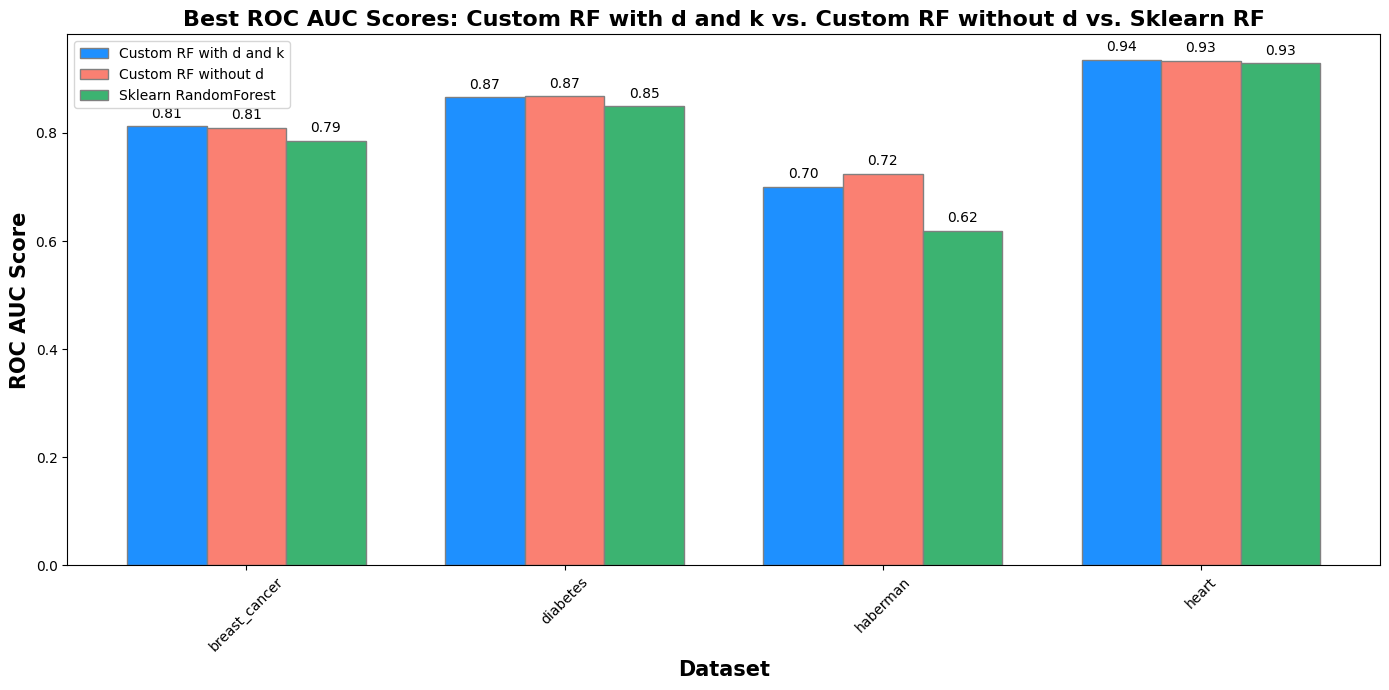

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(14, 7))
width = 0.25  # Adjusting the width of the bars to accommodate three groups

# Assuming best_combinations_custom_d_k, best_combinations_custom_without_d, and best_combinations_sklearn are available
r1 = np.arange(len(best_combinations_custom_d_k['Dataset']))
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]

# Plotting
plt.bar(r1, best_combinations_custom_d_k['Custom MSE'], color='dodgerblue', width=width, edgecolor='grey', label='Custom RF with d and k')
plt.bar(r2, best_combinations_custom_without_k['Custom MSE'], color='salmon', width=width, edgecolor='grey', label='Custom RF without d')
plt.bar(r3, best_combinations_sklearn['Sklearn MSE'], color='mediumseagreen', width=width, edgecolor='grey', label='Sklearn RandomForest')

# Adding xticks and labels
plt.xlabel('Dataset', fontweight='bold', fontsize=15)
plt.xticks([r + width for r in range(len(best_combinations_custom_d_k['Dataset']))], best_combinations_custom_d_k['Dataset'], rotation=45)
plt.ylabel('MSE Score', fontweight='bold', fontsize=15)
plt.title('MSE Scores: Custom RF with d and k vs. Custom RF without d vs. Sklearn RF', fontweight='bold', fontsize=16)
plt.legend()

# Adding value labels on top of bars
for i in range(len(r1)):
    plt.text(r1[i], best_combinations_custom_d_k['Custom MSE'].iloc[i] + 0.01, f"{best_combinations_custom_d_k['Custom MSE'].iloc[i]:.2f}", ha='center', va='bottom')
    plt.text(r2[i], best_combinations_custom_without_k['Custom MSE'].iloc[i] + 0.01, f"{best_combinations_custom_without_k['Custom MSE'].iloc[i]:.2f}", ha='center', va='bottom')
    plt.text(r3[i], best_combinations_sklearn['Sklearn MSE'].iloc[i] + 0.01, f"{best_combinations_sklearn['Sklearn MSE'].iloc[i]:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

obtain the sample sizes in the leafs of these three RF versions and plot them as histograms


I will have to change it for Regression....

fetching diabetes from pmlb
fetching heart from imodels


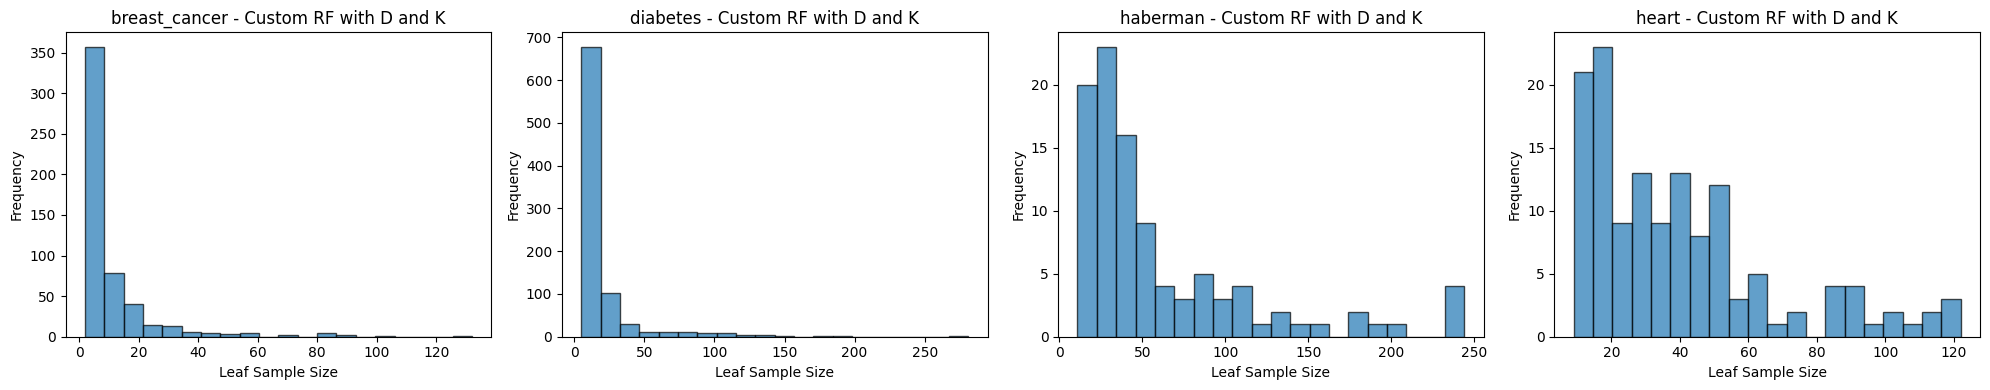

fetching diabetes from pmlb
fetching heart from imodels


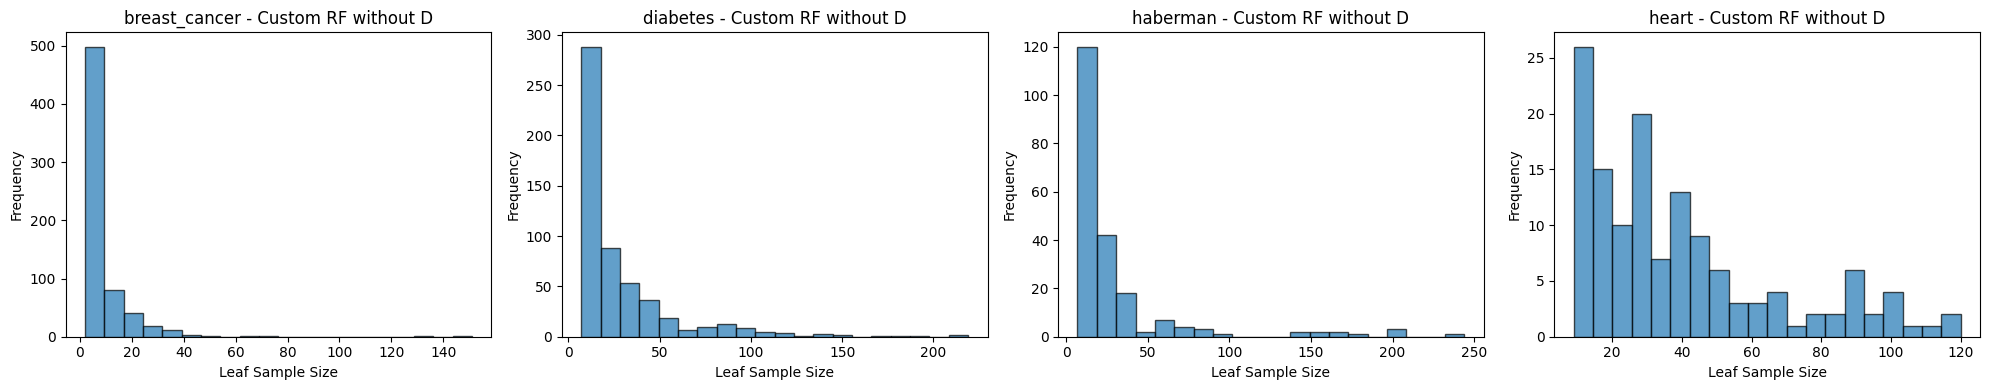

fetching diabetes from pmlb
fetching heart from imodels


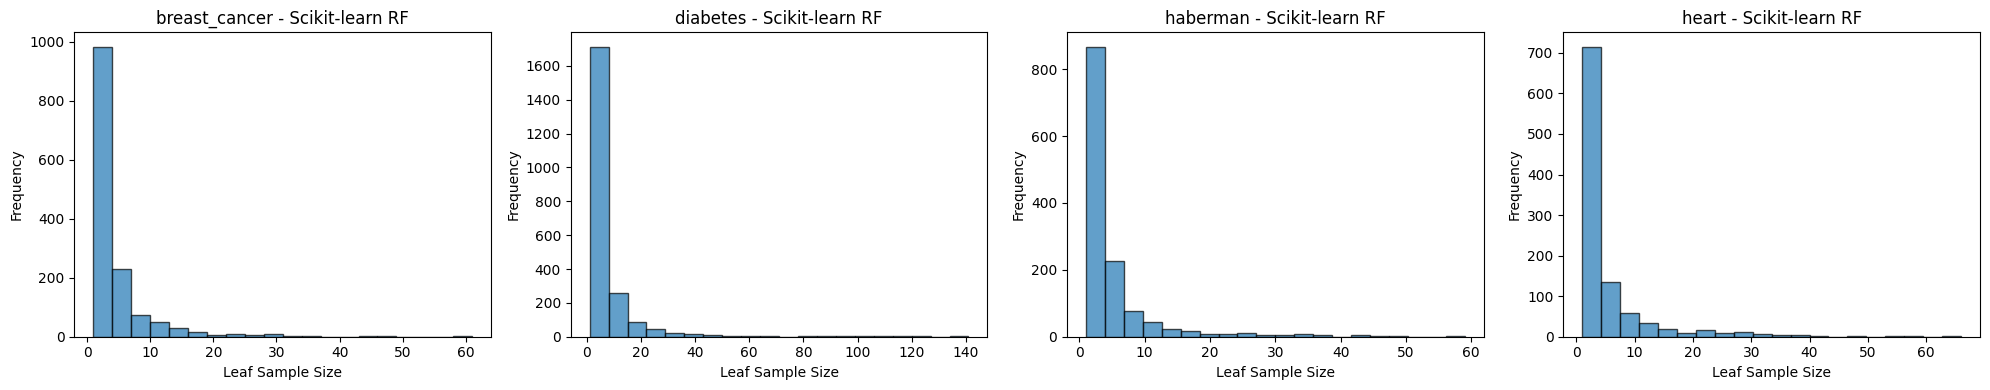

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from collections import Counter
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split

# import warnings
# warnings.filterwarnings('ignore')


# best_combinations_custom_without_k.iloc[:, :-1].to_dict()

# # Transforming the dictionary to a list of dictionaries
# params_custom_without_d = [
#     {
#         "dataset": best_combinations_custom_without_k['Dataset'][i],
#         "k": best_combinations_custom_without_k['K'][i],
#         "max_features": best_combinations_custom_without_k['Max Features'][i],
#     }
#     for i in range(len(best_combinations_custom_without_k['Dataset']))
# ]

# best_combinations_custom_d_k.iloc[:, :-1].to_dict()
# params_custom_d_k = [
#     {
#         "dataset": best_combinations_custom_d_k['Dataset'][i],
#         "k": best_combinations_custom_d_k['K'][i],
#         "max_features": best_combinations_custom_d_k['Max Features'][i],
#     }
#     for i in range(len(best_combinations_custom_d_k['Dataset']))
# ]

# params_custom_scikit_learn = [
#     {
#         "dataset": best_combinations_sklearn['Dataset'][i],
#         "max_features": best_combinations_sklearn['Max Features'][i],
#     }
#     for i in range(len(best_combinations_sklearn['Dataset']))
# ]

# def get_leaf_sample_sizes(random_forest, X_train):
#     leaf_sizes = []
#     if hasattr(random_forest, 'trees'):  # Custom RandomForest
#         for tree in random_forest.trees:
#             for node in tree.node_list:
#                 if node.leaf_node:
#                     leaf_sizes.append(node.samples)
#     elif hasattr(random_forest, 'estimators_'):  # scikit-learn RandomForest
#         for estimator in random_forest.estimators_:
#             leaf_indices = estimator.apply(X_train)
#             leaf_size_counts = Counter(leaf_indices)
#             leaf_sizes.extend(leaf_size_counts.values())
#     else:
#         raise ValueError("Unsupported RandomForest type")
#     return leaf_sizes

# # Assuming that datasets are preloaded and available in your environment
# datasets = {
#     "breast_cancer": "breast_cancer",
#     "diabetes": "diabetes",
#     "haberman": "haberman",
#     "heart": "heart",
# }

# # Function to plot histograms side by side
# def plot_histograms(params, task_name):
#     # Number of datasets
#     n_datasets = len(params)
#     plt.figure(figsize=(5 * n_datasets, 4))

#     for i, param in enumerate(params):
#         # Load and split the dataset
#         X, y, feature_names = get_clean_dataset(datasets[param["dataset"]])
#         X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#         # Train the model and get leaf sizes
#         if 'k' in param:
#             model = RandomForest(n_trees=25, treetype='classification', k=param.get('k', None), n_feature=param['max_features'])
#         else:
#             model = RandomForestClassifier(n_estimators=25, max_features=param['max_features'], random_state=42)
#         model.fit(X_train, y_train)
#         leaf_sizes = get_leaf_sample_sizes(model, X_train)

#         # Plotting
#         plt.subplot(1, n_datasets, i + 1)
#         plt.hist(leaf_sizes, bins=20, edgecolor='k', alpha=0.7)
#         plt.title(f"{param['dataset']} - {task_name}")
#         plt.xlabel('Leaf Sample Size')
#         plt.ylabel('Frequency')

#     plt.tight_layout()
#     plt.show()

# # Plot histograms for each task
# plot_histograms(params_custom_d_k, "Custom RF with D and K")
# plot_histograms(params_custom_without_d, "Custom RF without D")
# plot_histograms(params_custom_scikit_learn, "Scikit-learn RF")
